<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/AA_GRUPO3/blob/main/ASL_Sheet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercise 1: Errors and Regression

Consider the data set 'students_train' on 80 Portuguese students. It contains 5 variables:



*   Sex (female = 0, male = 1)
*   Age (in years)
*   Absences
*   Internet (internet access at home, no = 0, yes = 1)
*   Grade (final math grade)




In [11]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Charging Database
filename = 'students_train.csv'
data = pd.read_csv(filename, sep = ',')

# Data Review
print(data.shape)
data.head(5)

(80, 5)


,sex,age,absences,internet,grade
0,0,16,54,1,11
1,1,20,0,0,18
2,1,18,8,1,14
3,1,16,0,1,15
4,1,16,2,1,16


###a) We want to model the grade as a function of the other four variables. Use the linear regression model from Exercise sheet 1 Exercise 1 e) with the quadratic loss function. Fit the model to the training data using the result of Exercise sheet 1 Exercise 1 f). Report the coefficient estimate for θ. (You don't need to interpret the coefficients.)

The "X_design = np.hstack((np.ones((X.shape[0], 1)), X))" does the following:
* 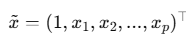 Includes a 1 for the intercept (theta 0).
* So we are adding a column of 1s added to the front of your 𝑋 matrix to handle this intercept in matrix form.

As X.shape = (80,4):
* (X.shape[0], 1) = Creates an array of shape (80, 1) filled with 1s (one for each row) which is the intercept column.

The np.hstack:
* np.hstack horizontally stacks the intercept column in front of the feature matrix

And the, the "theta_hat = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y"

Stands for:
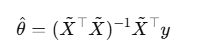


In [10]:
# Extract features and target
features = ['sex', 'age', 'absences', 'internet']
target = 'grade'

# Design matrix X with intercept
X = data[features].to_numpy()
X_design = np.hstack((np.ones((X.shape[0], 1)), X))  # Add intercept (column of 1s)
y = data[target].to_numpy()

# a) Compute theta using the normal equation
theta_hat = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y

print("a) Coefficient estimate (using the equation):")
for i, name in enumerate(['intercept'] + features):
    print(f"{name}: {theta_hat[i]:.4f}")

a) Coefficient estimate (using the equation):
intercept: 16.5931
sex: 1.7504
age: -0.3433
absences: -0.0366
internet: 0.1397


###b) Use a built-in function for linear regression models to confirm your estimate for θ from a).

In [7]:
# b) Use sklearn to confirm the result
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

print("\nb) Coefficient estimate (using sklearn LinearRegression):")
print("intercept:", model.intercept_)
for name, coef in zip(features, model.coef_):
    print(f"{name}: {coef:.4f}")


b) Coefficient estimate (using sklearn LinearRegression):
intercept: 16.593053251972265
sex: 1.7504
age: -0.3433
absences: -0.0366
internet: 0.1397


###c) Calculate the training error between the training data and your estimate model from a).

We are using the Mean Squared Error to calculate the error.

In [12]:
# Predict on training data
y_train_pred = X_design @ theta_hat

# Compute Mean Squared Error (MSE) on training set
training_mse = mean_squared_error(y, y_train_pred)

print(f"c) Training MSE: {training_mse:.4f}")

c) Training MSE: 10.9306


###d) The data set 'students_test' contains data for 20 more students. Test your estimated model from a) on the test data. Calculate the test error between the test data and your estimated model and compare it to the training error from c).

In [13]:
# Charging Database
filename = 'students_test.csv'
data_test = pd.read_csv(filename, sep = ',')

# Data Review
print(data_test.shape)
data_test.head(5)

(20, 5)


,sex,age,absences,internet,grade
0,0,17,14,1,5
1,1,18,0,1,0
2,0,17,2,0,11
3,0,18,7,1,17
4,0,18,4,1,14


In [15]:
# Extract test features and target
X_test = data_test[features].to_numpy()
X_test_design = np.hstack((np.ones((X_test.shape[0], 1)), X_test))  # Add intercept
y_test = data_test[target].to_numpy()

# Predict on test data using the same theta
y_test_pred = X_test_design @ theta_hat

# Compute Mean Squared Error (MSE) on test set
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"d) Test MSE: {test_mse:.4f}")

d) Test MSE: 18.3367


Does it make sense that the MSE on the test data is greater than the one from the training data?

Yes, it's pretty normal, this happens because:

* The model is trained on the training data, so, it has “seen” those data points and adjusted itself to minimize the error on them.
* The test data is unseen, so the model has never seen those examples during training.

Therefore, the training error is lower because the model was built specifically to perform well on that data. The test error is higher because it's a better reflection of the model's ability to generalize to new, unseen data.

